# Проверка статистических гипотез

Выбрать гипотезу для проверки:

О равенстве математических ожиданий или гипотезу о равенстве медиан.

- Обосновать выбор.
- Проверить гипотезу.


1. Загружаем необходимые библиотеки:

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Импортируем данные:

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Анализ данных на питоне /4 лабораторная /AmesHousing.txt'

df = pd.read_csv(file_path,  sep="\t", header = 0, index_col=False )

Посмотрим на данные, все ли хорошо?

In [ ]:
df.head(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


# 1

Выбираем первую колличественную переменную для сравнения цены домов:

**Размер участка (Lot Area)** в футах

Земельный участок является важным фактором при определении стоимости недвижимости, особенно в районах с высокой плотностью населения.

Посмотрим на характеристики переменной:

In [ ]:
df['Lot Area'].describe()

,Lot Area
count,2930.000000
mean,10147.921843
std,7880.017759
min,1300.000000
25%,7440.250000
50%,9436.500000
75%,11555.250000
max,215245.000000


Разделим данные о домах на две категории по медианному значению:
- Дома с большим участком
- Дома с маленьким участком

In [ ]:
big_area = df['SalePrice'][df['Lot Area'] >= df['Lot Area'].median()]
small_area = df['SalePrice'][df['Lot Area'] < df['Lot Area'].median()]

Посмотрим на данные:

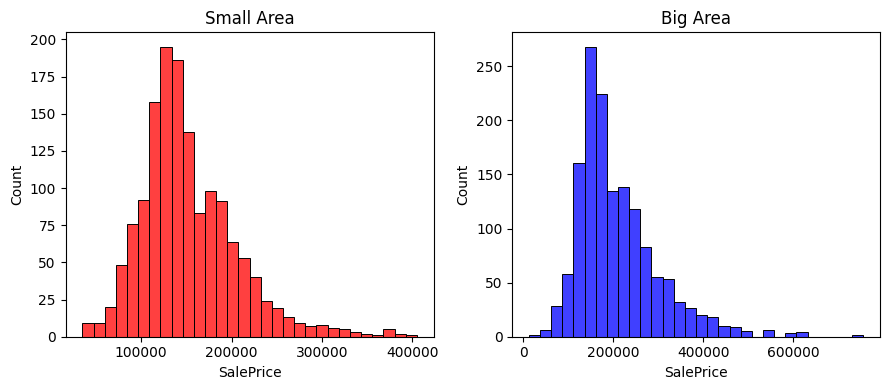

In [ ]:
plt.figure(figsize=(9, 4))

# Первая гистограмма - Small Area
plt.subplot(1, 2, 1)
sns.histplot(small_area, color='red', bins=30)
plt.title('Small Area')


# Вторая гистограмма - Big Area
plt.subplot(1, 2, 2)
sns.histplot(big_area, color='blue', bins=30)
plt.title('Big Area')

plt.tight_layout()
plt.show()

## Проверим нормальность

У нас не очень много наблюдений (около 1500), поэтому проверим **критерием Шапиро-Уилка:**

In [ ]:
res = stats.shapiro(big_area)
print(f"p-value: {res[1]:.18f}")

p-value: 0.000000000000000000


In [ ]:
res = stats.shapiro(small_area)
print(f"p-value: {res[1]:.18f}")

p-value: 0.000000000000000000


Видно, что и в категории с большой площадью и с маленькой, цена домов не распределена нормально. Уровень p_value равен 0, что меньше допустимого критерия значимости 0.05. Гипотезу о нормальности можно отвергать.

Из графиков визуально видно, что оба распрелеления скошены вправо с большим колличесвом выбосов в виде дорогих домов.

## Сформулируем гипотезу

Распределение обоих выборок существенно отличается от нормального, в качестве центра будем использовать медиану

Сформулируем гипотезу:

H0 : Медиана цены домов с большим участком равна медиане цены домов с маленьким участком

Н1: Медианы не равны


---


Если центром распределения выбрана **медиана**, центры сравниваются с помощью критерия **Манна–Уитни** или критерия **Вилкоксона**.

Так как наши выборки независимые, будем использовать критерий Манна-Уитни:

In [ ]:
res = stats.mannwhitneyu(big_area, small_area)
print(f'p-value: {res[1]:.18f}')

p-value: 0.000000000000000000


p-value получилось почти равным 0, поэтому у нас есть основания отвергнуть основную гипотезу Н0: разницы между медианами нет

Вывод: Цены домов значимо различаются по велечине участка - разница медиан в выборках вызвана не случайными отклонениями.

## Посмотрим на boxplot:

<ipython-input-22-f0a02fcc791c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='SalePrice', data=boxplot_data, palette='Set2')


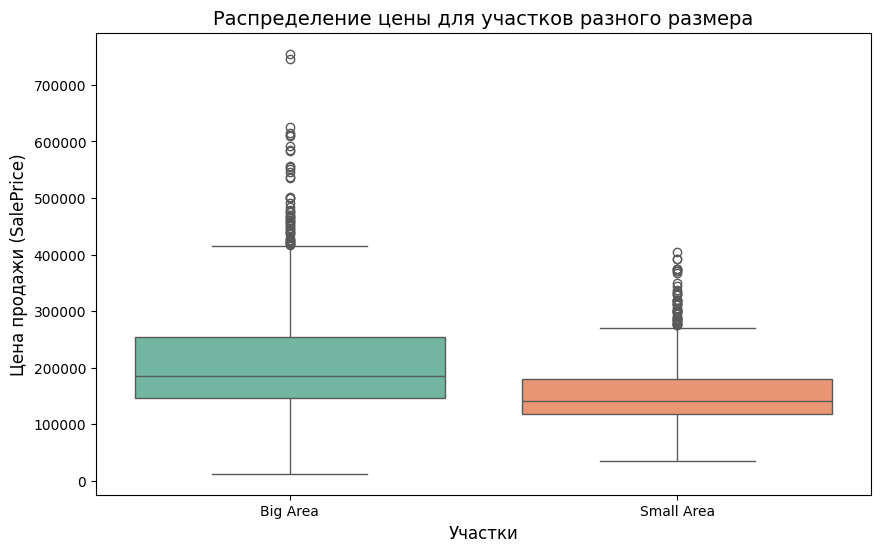

In [ ]:
boxplot_data = pd.DataFrame({
    'SalePrice': pd.concat([big_area, small_area]),
    'Group': ['Big Area'] * len(big_area) + ['Small Area'] * len(small_area)
})

# Построение ящика с усами
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='SalePrice', data=boxplot_data, palette='Set2')

# Настройка графика
plt.title('Распределение цены для участков разного размера', fontsize=14)
plt.xlabel('Участки', fontsize=12)
plt.ylabel('Цена продажи (SalePrice)', fontsize=12)

plt.show()

# 2

Выбираем вторую колличественную переменную для разбиения данных на 2 категории.

Будем использовать **Год постройки дома (Year Built)**

Более новые дома, как правило, имеют современные планировки, материалы и системы, что увеличивает их стоимость.

Ожидаем: Дома, построенные позже медианного года, вероятно, стоят дороже.

In [ ]:
df['Year Built'].describe()

,Year Built
count,2930.000000
mean,1971.356314
std,30.245361
min,1872.000000
25%,1954.000000
50%,1973.000000
75%,2001.000000
max,2010.000000


Разделим данные о домах на две категории по медианному значению:
- Новые дома
- Старые дома

In [ ]:
old = df['SalePrice'][df['Year Built'] >= df['Year Built'].median()]
new = df['SalePrice'][df['Year Built'] < df['Year Built'].median()]

Посмотрим на данные:

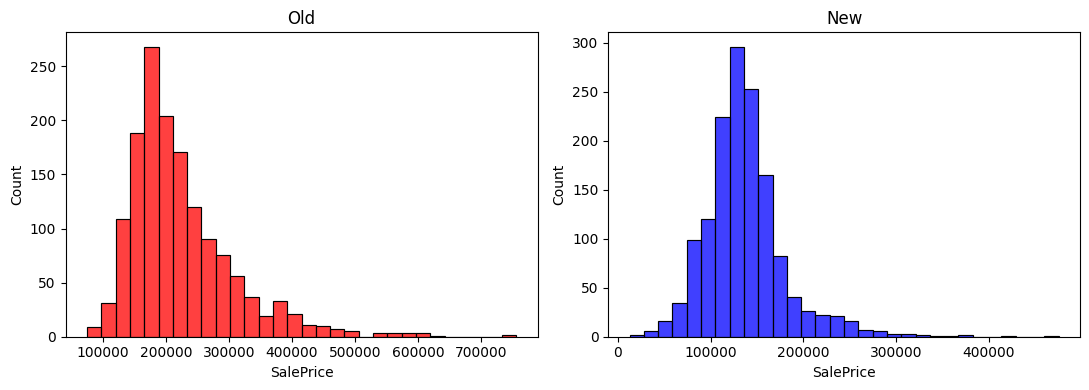

In [ ]:
plt.figure(figsize=(11, 4))

# Первая гистограмма - Small Area
plt.subplot(1, 2, 1)
sns.histplot(old, color='red', bins=30)
plt.title('Old')


# Вторая гистограмма - Big Area
plt.subplot(1, 2, 2)
sns.histplot(new, color='blue', bins=30)
plt.title('New')

plt.tight_layout()
plt.show()

## Проверим нормальность:

У нас не очень много наблюдений (около 1500), поэтому проверим **критерием Шапиро-Уилка**

In [ ]:
res = stats.shapiro(new)
print(f"p-value: {res[1]:.18f}")

p-value: 0.000000000000000000


In [ ]:
res = stats.shapiro(old)
print(f"p-value: {res[1]:.18f}")

p-value: 0.000000000000000000


Видно, что в обоих категориях, цена домов не распределена нормально. Уровень p_value равен 0, что меньше допустимого критерия значимости 0.05. **Гипотезу о нормальности можно отвергать.**

Из графиков визуально видно, что оба распрелеления скошены вправо с большим колличесвом выбосов в виде дорогих домов.

## Сформулируем гипотезу

Распределение обоих выборок существенно отличается от нормального, в качестве центра будем использовать **медиану**

**Сформулируем гипотезу:**

H0 : Медиана цены старых домов равна медиане цены новых домов

Н1: Медианы не равны


---


Если центром распределения выбрана **медиана**, центры сравниваются с помощью критерия Манна–Уитни или критерия Вилкоксона.

Так как наши выборки независимые, будем использовать **критерий Манна-Уитни**:

In [ ]:
res = stats.mannwhitneyu(old, new)
print(f'p-value: {res[1]:.18f}')

p-value: 0.000000000000000000


p-value получилось почти равным 0, поэтому у нас **есть основания отвергнуть основную гипотезу Н0**: разницы между медианами нет

Вывод: Цены домов **значимо различаются** по году постойки - разница медиан в выборках вызвана не случайными отклонениями.

## Посмотрим на boxplot:

<ipython-input-19-87403feeb2e3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='SalePrice', data=boxplot_data, palette='Set2')


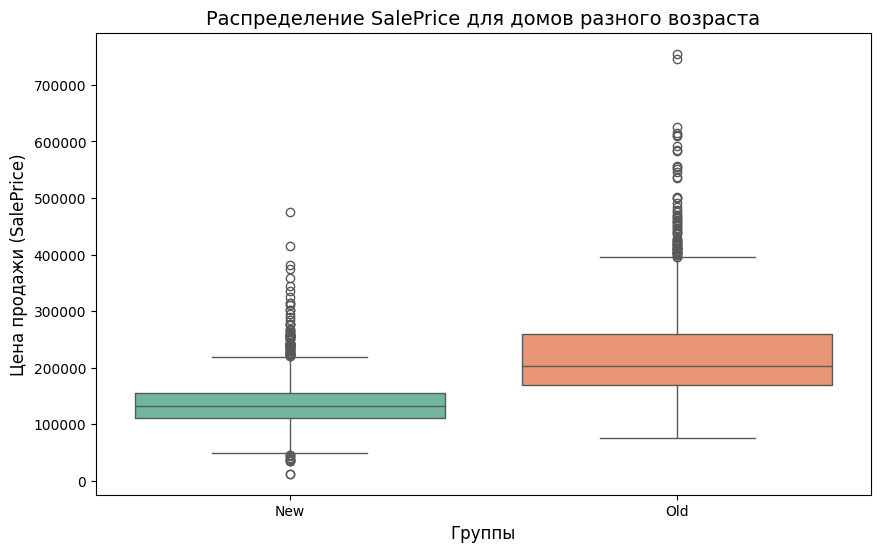

In [ ]:
# Создаем DataFrame для удобства визуализации
boxplot_data = pd.DataFrame({
    'SalePrice': pd.concat([new, old]),
    'Group': ['New'] * len(new) + ['Old'] * len(old)
})

# Построение ящика с усами
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='SalePrice', data=boxplot_data, palette='Set2')

# Настройка графика
plt.title('Распределение SalePrice для домов разного возраста', fontsize=14)
plt.xlabel('Группы', fontsize=12)
plt.ylabel('Цена продажи (SalePrice)', fontsize=12)
plt.show()